In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f0 = open('./CelebA-HQ-to-CelebA-mapping.txt')
f1 = open('./CelebAMask-HQ-attribute-anno.txt')
f2 = open('./CelebAMask-HQ-pose-anno.txt')

In [3]:
mapping = f0.read().splitlines()
attrib = f1.read().splitlines()
pose = f2.read().splitlines()

In [8]:
mapping

['idx        orig_idx   orig_file',
 '0          119613     119614.jpg',
 '1          99094      099095.jpg',
 '2          200121     200122.jpg',
 '3          81059      081060.jpg',
 '4          202040     202041.jpg',
 '5          614        000615.jpg',
 '6          50915      050916.jpg',
 '7          166545     166546.jpg',
 '8          143861     143862.jpg',
 '9          101741     101742.jpg',
 '10         157745     157746.jpg',
 '11         78315      078316.jpg',
 '12         167419     167420.jpg',
 '13         167706     167707.jpg',
 '14         55525      055526.jpg',
 '15         89615      089616.jpg',
 '16         34958      034959.jpg',
 '17         174481     174482.jpg',
 '18         154921     154922.jpg',
 '19         163131     163132.jpg',
 '20         57379      057380.jpg',
 '21         97643      097644.jpg',
 '22         82111      082112.jpg',
 '23         117314     117315.jpg',
 '24         134266     134267.jpg',
 '25         116486     116487.jpg',
 '

In [5]:
list = attrib[1].split(' ')

In [6]:
# file = l[0]

In [7]:
len(attrib[1].split(' '))

40

In [8]:
# l[3]

In [128]:
img = cv2.imread('./CelebA-HQ-img/10208.jpg')

In [129]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

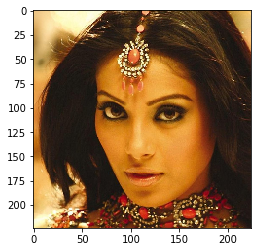

In [130]:
plt.imshow(img);

In [138]:
mask = cv2.imread('./CelebAMask-HQ-mask-anno/5/10208_r_eye.png')

mask = cv2.resize(mask, (224, 224))


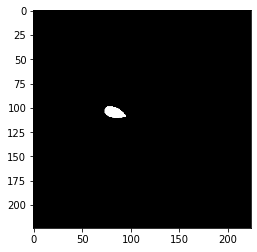

In [139]:
plt.imshow(mask);

In [140]:
masked = cv2.addWeighted(img, 1, mask, 0.9, 0)

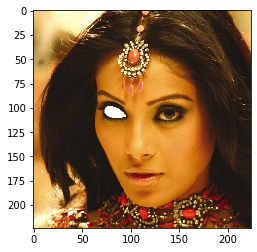

In [141]:
plt.imshow(masked)

In [100]:
files = os.listdir('./CelebA-HQ-img/')

In [104]:
files.index('29999.jpg')

21729

In [67]:
path = './CelebAMask-HQ-mask-pool/'

In [68]:
masks = os.listdir(path)

In [69]:
len(masks)

137496

In [63]:
# We have to delete all those mask which irrelevant to this task

# CelebAMask-HQ-mask-pool has pool of masks

In [64]:
print(masks[1])

26639_ear_r.png


In [65]:
i = 0
for mask in masks:
    if "eye" in mask or 'mouth' in mask or 'lip' in mask:
        continue
    else:
        os.remove(path+mask)
    
    
    if i%10000==0:
        print(f'{i} files processed')
    i+=1
    

0 files processed
10000 files processed
20000 files processed
30000 files processed
40000 files processed
50000 files processed
60000 files processed
70000 files processed
80000 files processed
90000 files processed
100000 files processed
110000 files processed
120000 files processed
130000 files processed
140000 files processed
150000 files processed
160000 files processed
170000 files processed
180000 files processed
190000 files processed
200000 files processed
210000 files processed
220000 files processed
230000 files processed


In [82]:
len(masks)

137496

In [44]:
masks.index('04071_l_eye.png')

0

In [54]:
os.listdir('./pool-backup/')[0]

'CelebAMask-HQ-mask-pool'

In [70]:
30*4

120

In [72]:
masks = sorted(masks)

In [76]:
masks[-10:]

['29998_l_eye.png',
 '29998_l_lip.png',
 '29998_mouth.png',
 '29998_r_eye.png',
 '29998_u_lip.png',
 '29999_l_eye.png',
 '29999_l_lip.png',
 '29999_mouth.png',
 '29999_r_eye.png',
 '29999_u_lip.png']

In [79]:
# count how many mouth masks are there
total_mouth = 0
total_l_eye = 0
total_r_eye = 0
total_u_lip = 0
total_l_lip = 0

for mask in masks:
    if 'l_eye' in mask:
        total_l_eye+=1
    elif 'r_eye' in mask:
        total_r_eye+=1
    elif 'u_lip' in mask:
        total_u_lip +=1
    elif 'l_lip' in mask:
        total_l_lip+=1
    elif 'mouth' in mask:
        total_mouth+=1

In [80]:
print(total_l_eye, total_r_eye)
print(total_l_lip, total_u_lip)
print(total_mouth)


29258 29260
29896 29870
17663


In [293]:
sum(number_of_masks)

135947

In [84]:
np.unique(masks, return_counts=True)

(array(['00000_l_eye.png', '00000_l_lip.png', '00000_mouth.png', ...,
        '29999_mouth.png', '29999_r_eye.png', '29999_u_lip.png'],
       dtype='<U15'), array([1, 1, 1, ..., 1, 1, 1]))

In [59]:
img = cv2.imread('./CelebA-HQ-img/299.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (224, 224))

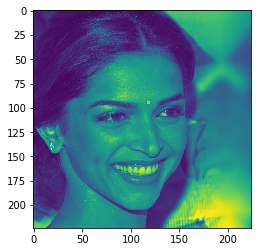

In [60]:
plt.imshow(img);

In [61]:
l_eye = cv2.imread('./CelebAMask-HQ-mask-pool/00299_l_eye.png')
l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2GRAY)
l_eye = cv2.resize(l_eye, (224, 224))

In [62]:
r_eye = cv2.imread('./CelebAMask-HQ-mask-pool/00299_r_eye.png')
r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2GRAY)
r_eye = cv2.resize(r_eye, (224, 224))

(224, 224)


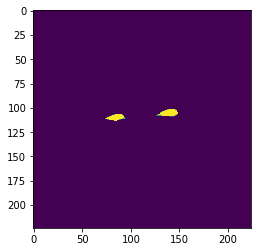

In [63]:
eyes = cv2.add(l_eye, r_eye)
plt.imshow(eyes)
print(eyes.shape)

In [64]:
l_lip = cv2.imread('./CelebAMask-HQ-mask-pool/00299_l_lip.png')
l_lip = cv2.cvtColor(l_lip, cv2.COLOR_BGR2GRAY)
l_lip = cv2.resize(l_lip, (224, 224))

u_lip = cv2.imread('./CelebAMask-HQ-mask-pool/00299_u_lip.png')
u_lip = cv2.cvtColor(u_lip, cv2.COLOR_BGR2GRAY)
u_lip = cv2.resize(u_lip, (224, 224))

(224, 224)


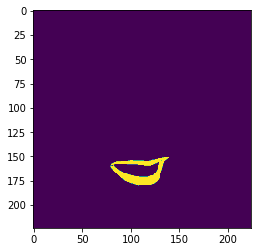

In [65]:
lips = cv2.add(l_lip, u_lip)
plt.imshow(lips)
print(lips.shape)

In [66]:
mouth = cv2.imread('./CelebAMask-HQ-mask-pool/00299_mouth.png')
mouth = cv2.cvtColor(mouth, cv2.COLOR_BGR2GRAY)
mouth = cv2.resize(mouth, (224, 224))

(224, 224)


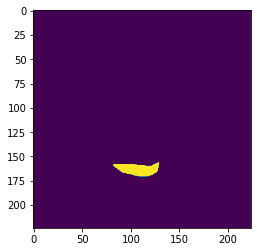

In [67]:
plt.imshow(mouth)
print(mouth.shape)

In [68]:
face = cv2.add(eyes, lips)

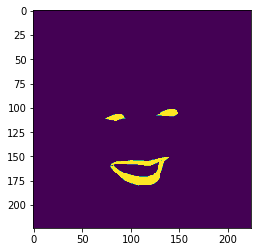

In [69]:
plt.imshow(face)

In [70]:
mask = cv2.add(face, mouth)

In [71]:
mask = mask.reshape(224, 224)

In [72]:
mask.shape

(224, 224)

In [73]:
masked = cv2.addWeighted(img, 1, mask, 0.9, 0)

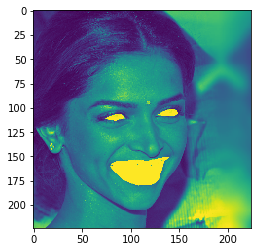

In [74]:
plt.imshow(masked)

In [195]:
masks[70:80]

['00015_u_lip.png',
 '00016_l_eye.png',
 '00016_l_lip.png',
 '00016_r_eye.png',
 '00016_u_lip.png',
 '00017_l_eye.png',
 '00017_l_lip.png',
 '00017_mouth.png',
 '00017_r_eye.png',
 '00017_u_lip.png']

In [225]:
img = cv2.imread('./CelebA-HQ-img/169.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

In [9]:
plt.imshow(img)
plt.title(img.shape)
plt.show()

NameError: name 'img' is not defined

In [10]:
l_eye = cv2.imread('./CelebAMask-HQ-mask-pool/00169_l_eye.png')
l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2RGB)
l_eye = cv2.resize(l_eye, (224, 224))
r_eye = cv2.imread('./CelebAMask-HQ-mask-pool/00169_r_eye.png')
r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2RGB)
r_eye = cv2.resize(r_eye, (224, 224))

(224, 224, 3)


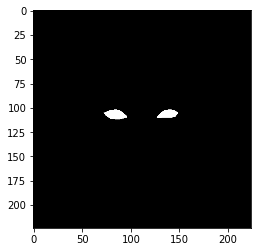

In [223]:
eyes = cv2.add(l_eye, r_eye)
plt.imshow(eyes)
print(eyes.shape)

In [230]:
l_lip = cv2.imread('./CelebAMask-HQ-mask-pool/00169_l_lip.png')
l_lip = cv2.cvtColor(l_lip, cv2.COLOR_BGR2RGB)
l_lip = cv2.resize(l_lip, (224, 224))

u_lip = cv2.imread('./CelebAMask-HQ-mask-pool/00169_u_lip.png')
u_lip = cv2.cvtColor(u_lip, cv2.COLOR_BGR2RGB)
u_lip = cv2.resize(u_lip, (224, 224))

(224, 224, 3)


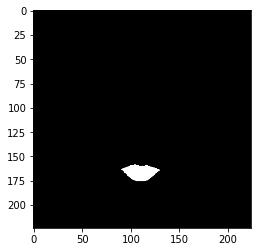

In [231]:
lips = cv2.add(l_lip, u_lip)
plt.imshow(lips)
print(lips.shape)

In [232]:
mouth = cv2.imread('./CelebAMask-HQ-mask-pool/00001_mouth.png')
mouth = cv2.cvtColor(mouth, cv2.COLOR_BGR2RGB)
mouth = cv2.resize(mouth, (224, 224))

(224, 224, 3)


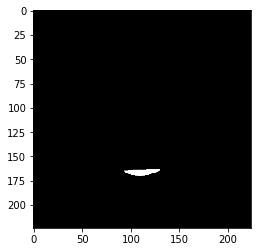

In [233]:
plt.imshow(mouth)
print(mouth.shape)

In [234]:
face = cv2.add(eyes, lips)

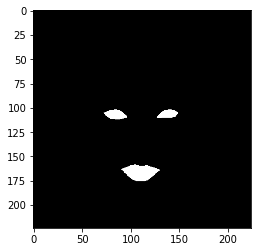

In [235]:
plt.imshow(face)

In [236]:
face = cv2.add(eyes, lips)

In [239]:
face =  cv2.add(face, mouth)

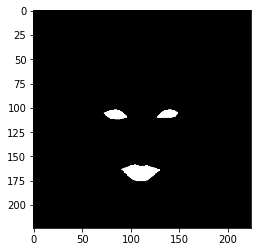

In [240]:
plt.imshow(face)

In [241]:
masked = cv2.addWeighted(img, 1, face, 0.9, 0)

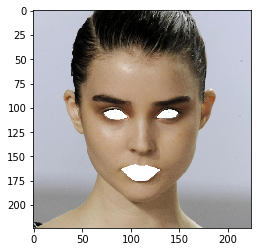

In [243]:
plt.imshow(masked);

In [295]:
masks = ['l_eye', 'r_eye', 'u_lip', 'l_lip', 'mouth']
number_of_masks = [total_l_eye, total_r_eye, total_u_lip, total_l_lip, total_mouth]

In [296]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

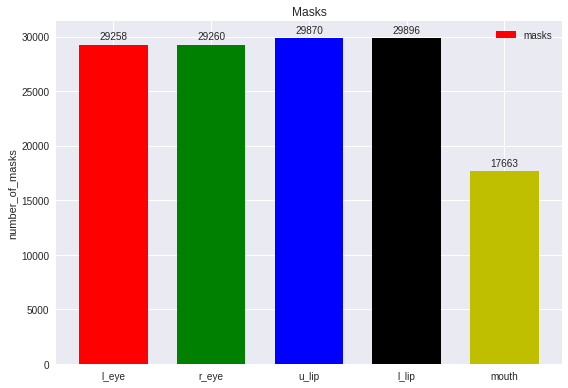

In [299]:
x = np.arange(len(masks))  # the label locations
width = 0.7  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x , number_of_masks, width, label='masks', color = 'rgbkymc')
ax.set_ylabel('number_of_masks')
ax.set_title('Masks')
ax.set_xticks(x)
ax.set_xticklabels(masks)
ax.legend()

autolabel(rects)
fig.tight_layout()

plt.show()

#### Note
We have 30000 images in Dataset but from the above plot we can see that we don't have same number of masks, we will combine them all  

In [16]:
images = os.listdir('./CelebA-HQ-img/')
masks = sorted(os.listdir('./CelebAMask-HQ-mask-pool/'))

In [17]:
print(len(images), len(masks))

30000 137496


In [18]:
print(images[20:25], masks[20:25])

['3212.jpg', '1223.jpg', '7298.jpg', '23467.jpg', '4297.jpg'] ['00004_l_lip.png', '00004_mouth.png', '00004_r_eye.png', '00004_u_lip.png', '00005_l_eye.png']


In [19]:
images[0].split('.')[0]

'16170'

In [87]:
!mkdir merged-mask/

In [77]:
path = './CelebAMask-HQ-mask-pool/'
merged = './merged-mask/'

In [78]:
def read_img(files, path=path):
    
    imgs = []
    
    # read all the masks from the list(which belongs to only one class)
    for file in files:
        img = cv2.imread(path+file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        imgs.append(img)
        
    return imgs

def combine(imgs):
    
    if len(imgs)<2:
        merged = imgs[0]
        return merged
    else:
        merged = cv2.add(imgs[0], imgs[1])
    
        for i in range(2, len(imgs), 1):
            merged = cv2.add(merged, imgs[i])

        return merged

def process(files):
    imgs = read_img(files)
    combined = combine(imgs)
    return combined
    


In [90]:
prev = masks[0].split('_')[0]
same_img = []
img_num = 0

for i, mask in enumerate(masks):
    
    current = mask.split("_")[0]
    
    # make the list of the masks of the same image and combine them
    if current == prev:
        same_img.append(mask)
    
    else:
        # read the r&l eyes, l&u lips as well mouth mask(if it is present)
        mouth_eyes_lips_combined_mask = process(same_img)
        cv2.imwrite(merged+str(img_num)+'.jpg', mouth_eyes_lips_combined_mask)
        img_num+=1
        
        prev = current
        same_img.clear()
        same_img.append(mask)
    
    if i%10000==0:
        print(f'{i} files have been processed')
        

0 files have been processed
10000 files have been processed
20000 files have been processed
30000 files have been processed
40000 files have been processed
50000 files have been processed
60000 files have been processed
70000 files have been processed
80000 files have been processed
90000 files have been processed
100000 files have been processed
110000 files have been processed
120000 files have been processed
130000 files have been processed


In [79]:
imgs = read_img(['00010_l_eye.png', '00010_l_lip.png', '00010_r_eye.png', '00010_u_lip.png'])

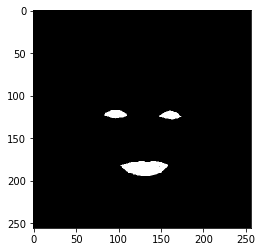

In [80]:
combined = combine(imgs)
plt.imshow(combined)
plt.show()

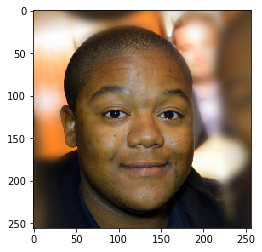

In [81]:
img = read_img(files=['10.jpg'], path='./CelebA-HQ-img/')
plt.imshow(img[0]);

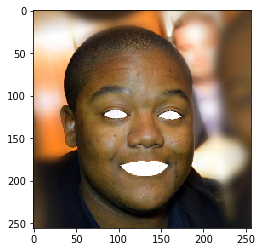

In [82]:
segmented = cv2.addWeighted(img[0], 1, combined, 0.9, 0)
plt.imshow(segmented)

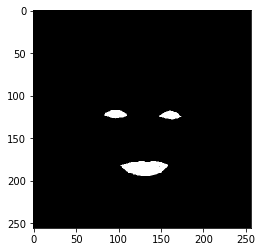

In [83]:
plt.imshow(process(['00010_l_eye.png', '00010_l_lip.png', '00010_r_eye.png', '00010_u_lip.png']))

In [108]:
# test the merged mask
img = read_img(files=['29994.jpg'], path='./CelebA-HQ-img/')[0]
mask = read_img(files=['29990.jpg'], path='./merged-mask/')[0]

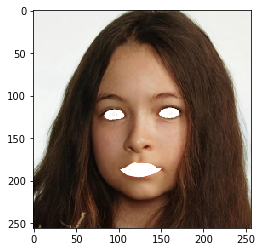

In [109]:
segmented = cv2.addWeighted(img, 1, mask, 0.9, 0)
plt.imshow(segmented)

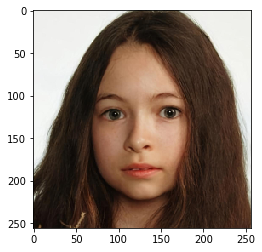

In [110]:
plt.imshow(img);

In [63]:
# top image is segmented with combined mask(after processing) and the bottom is masked using different masks(l_eye, r_eye, u_lip, l_lip, mouth) 
# and combine them manually and both are same hence it is validated that processing is correct.